In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ydata_profiling
import plotly.express as px
from matplotlib.ticker import FormatStrFormatter
from sklearn.preprocessing import MinMaxScaler,StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.svm import SVC
import sklearn.metrics as sk
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [72]:
data = pd.read_csv("bank-additional-full.csv",sep=";")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [49]:
data.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [8]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [9]:
data.duplicated().sum()

12

In [10]:
data = data.drop_duplicates()

In [42]:
data.shape

(41176, 21)

In [41]:
data.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# EDA

Data has been analyzed for -

Correlations
Univariate & Bivariate analysis
Outliers

# Age: Check how customers' behavior is per age group

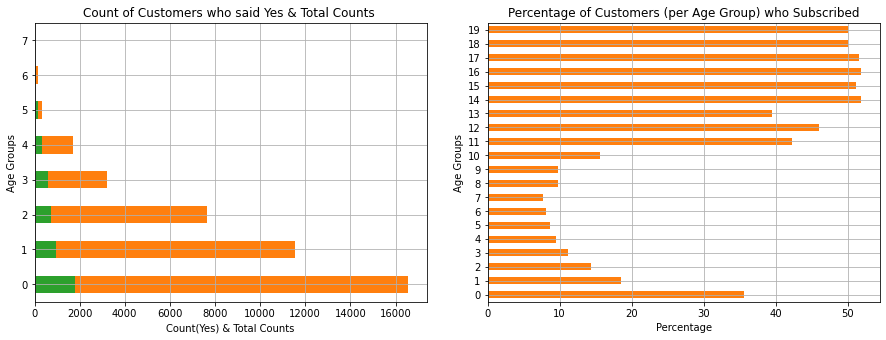

In [18]:
fig, axs = plt.subplots(1,2, figsize=(13,5))
plt.tight_layout(pad=3)

ax = data["age"].value_counts(bins=8).plot(kind='barh', color="C1", ax=axs[0])
data[data["y"]=='yes']["age"].value_counts(bins=8).plot(kind='barh', ax = ax, color="C2")
ax2 = (data[data["y"]=='yes']["age"].value_counts(bins=20) * 100 / data["age"].value_counts(bins=20) ).plot(kind='barh', color="C1", ax=axs[1])
axs[0].set_xlabel('Count(Yes) & Total Counts')
axs[0].set_ylabel('Age Groups')
axs[0].title.set_text('Count of Customers who said Yes & Total Counts ')
axs[0].yaxis.set_major_formatter(FormatStrFormatter('%d'))
axs[1].yaxis.set_major_formatter(FormatStrFormatter('%d'))
axs[0].grid()
axs[1].grid()
axs[1].set_xlabel('Percentage')
axs[1].set_ylabel('Age Groups')
axs[1].title.set_text('Percentage of Customers (per Age Group) who Subscribed')

Conclusion:

Any customer above the age of 60 has atleast a 40% chance of subscribing for the Bank Term Deposit.
Customers above the age of 73 have a 50% chance of saying YES.

Age has some outliers

<AxesSubplot:xlabel='age'>

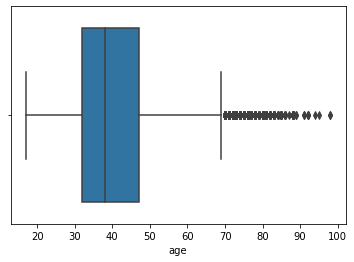

In [19]:
sns.boxplot(x=data["age"])

Next,

Lets evaluate the Job categories for the different clients

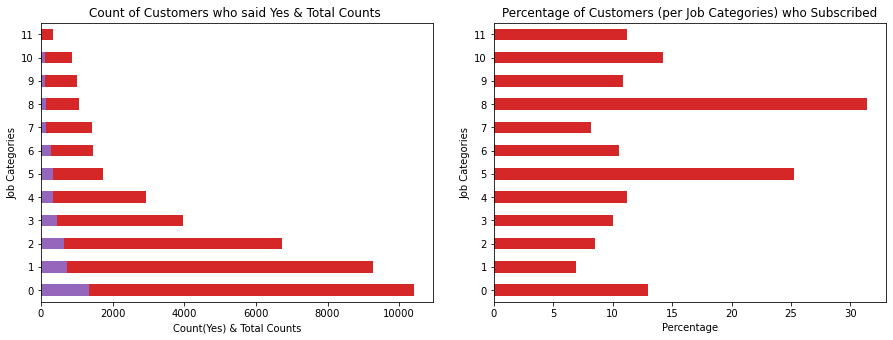

In [21]:
ig, axs = plt.subplots(1,2, figsize=(13,5))
plt.tight_layout(pad=3)
ax = data["job"].value_counts().plot(kind='barh', color="C3", ax=axs[0])
data[data["y"]=='yes']["job"].value_counts().plot(kind='barh', ax = ax, color="C4")
ax = (data[data["y"]=='yes']["job"].value_counts() * 100 / data["job"].value_counts() ).plot(kind='barh', color="C3", ax=axs[1])
axs[0].set_xlabel('Count(Yes) & Total Counts')
axs[0].set_ylabel('Job Categories')
axs[0].title.set_text('Count of Customers who said Yes & Total Counts ')
axs[0].yaxis.set_major_formatter(FormatStrFormatter('%d'))
axs[1].yaxis.set_major_formatter(FormatStrFormatter('%d'))
axs[1].set_xlabel('Percentage')
axs[1].set_ylabel('Job Categories')
axs[1].title.set_text('Percentage of Customers (per Job Categories) who Subscribed')

Conclusion:

Students and Retired customers have a good chance(> 25%) of creating a Fixed Deposit.

Next,

Lets explore the Marital status of customers.

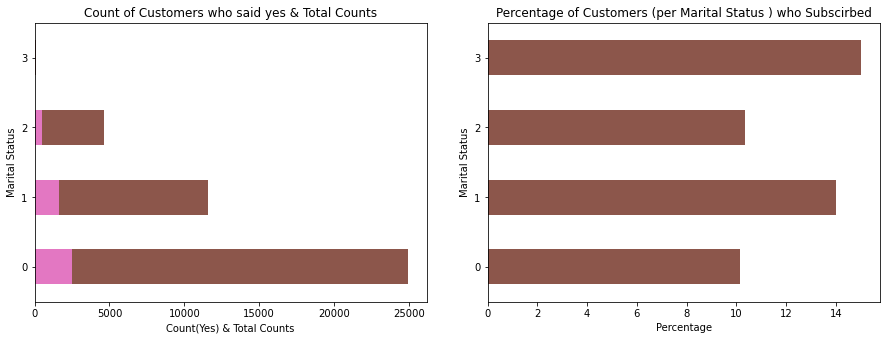

In [23]:
fig,axs = plt.subplots(1,2,figsize=(13,5))
plt.tight_layout(pad=3)

ax = data["marital"].value_counts().plot(kind="barh",color="C5",ax=axs[0])
data[data["y"] == "yes"]["marital"].value_counts().plot(kind="barh",ax=ax,color="C6")
ax = (data[data["y"]=="yes"]["marital"].value_counts() * 100 / data["marital"].value_counts()).plot(kind="barh",color="C5",ax=axs[1])

axs[0].set_xlabel("Count(Yes) & Total Counts")
axs[0].set_ylabel("Marital Status")
axs[0].title.set_text("Count of Customers who said yes & Total Counts")
axs[0].yaxis.set_major_formatter(FormatStrFormatter("%d"))
axs[1].yaxis.set_major_formatter(FormatStrFormatter("%d"))
axs[1].set_xlabel("Percentage")
axs[1].set_ylabel("Marital Status")
axs[1].title.set_text("Percentage of Customers (per Marital Status ) who Subscirbed")

Lets explore the Education of the customers.

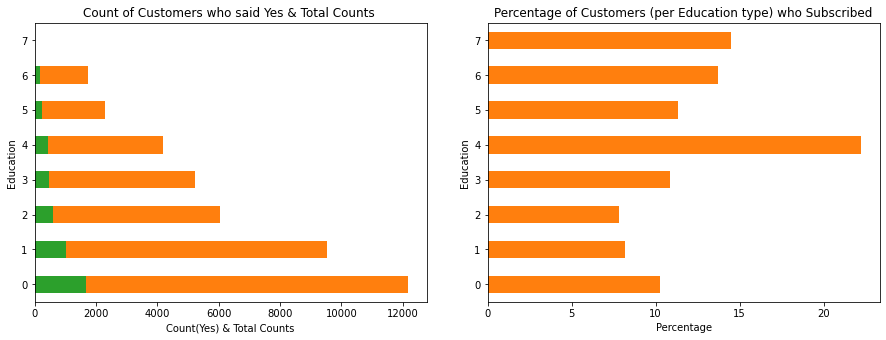

In [24]:
fig, axs = plt.subplots(1,2, figsize=(13,5))
plt.tight_layout(pad=3)

ax = data["education"].value_counts().plot(kind='barh', color="C1", ax=axs[0])
data[data["y"]=='yes']["education"].value_counts().plot(kind='barh', ax = ax, color="C2")
ax = (data[data["y"]=='yes']["education"].value_counts() * 100 / data["education"].value_counts() ).plot(kind='barh', color="C1", ax=axs[1])

axs[0].set_xlabel('Count(Yes) & Total Counts')
axs[0].set_ylabel('Education')
axs[0].title.set_text('Count of Customers who said Yes & Total Counts ')
axs[0].yaxis.set_major_formatter(FormatStrFormatter('%d'))
axs[1].yaxis.set_major_formatter(FormatStrFormatter('%d'))
axs[1].set_xlabel('Percentage')
axs[1].set_ylabel('Education')
axs[1].title.set_text('Percentage of Customers (per Education type) who Subscribed')

Conclusion:

Surprisingly, the Illiterate category has a higher chance(> 20%) of opting for the Term Deposit.

Next, lets check the numbers on whether the has customer Defaulted before or not.

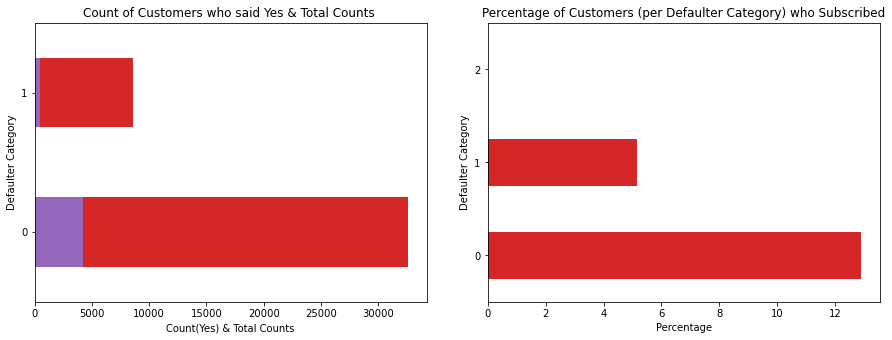

In [27]:
fig, axs = plt.subplots(1,2, figsize=(13,5))
plt.tight_layout(pad=3)

ax = data["default"].value_counts().plot(kind='barh', color="C3", ax=axs[0])
data[data["y"]=='yes']["default"].value_counts().plot(kind='barh', ax = ax, color="C4")
ax = (data[data["y"]=='yes']["default"].value_counts() * 100 / data["default"].value_counts() ).plot(kind='barh', color="C3", ax=axs[1])

axs[0].set_xlabel('Count(Yes) & Total Counts')
axs[0].set_ylabel('Defaulter Category')
axs[0].title.set_text('Count of Customers who said Yes & Total Counts ')
axs[0].yaxis.set_major_formatter(FormatStrFormatter('%d'))
axs[1].yaxis.set_major_formatter(FormatStrFormatter('%d'))
axs[1].set_xlabel('Percentage')
axs[1].set_ylabel('Defaulter Category')
axs[1].title.set_text('Percentage of Customers (per Defaulter Category) who Subscribed')


As expected, customers who have not defaulted have a higher probability of taking the Term Deposit.

Housing Loan is the next attribute.

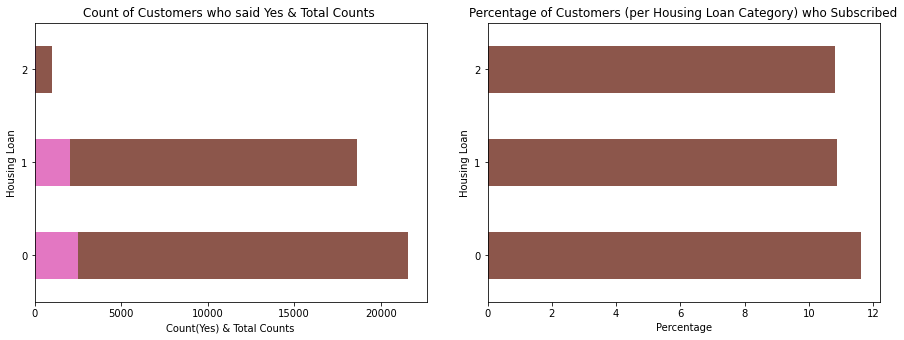

In [28]:
fig, axs = plt.subplots(1,2, figsize=(13,5))
plt.tight_layout(pad=3)

ax = data["housing"].value_counts().plot(kind='barh', color="C5", ax=axs[0])
data[data["y"]=='yes']["housing"].value_counts().plot(kind='barh', ax = ax, color="C6")
ax = (data[data["y"]=='yes']["housing"].value_counts() * 100 / data["housing"].value_counts() ).plot(kind='barh', color="C5", ax=axs[1])

axs[0].set_xlabel('Count(Yes) & Total Counts')
axs[0].set_ylabel('Housing Loan')
axs[0].title.set_text('Count of Customers who said Yes & Total Counts ')
axs[0].yaxis.set_major_formatter(FormatStrFormatter('%d'))
axs[1].yaxis.set_major_formatter(FormatStrFormatter('%d'))
axs[1].set_xlabel('Percentage')
axs[1].set_ylabel('Housing Loan')
axs[1].title.set_text('Percentage of Customers (per Housing Loan Category) who Subscribed')

Next is Personal Loan

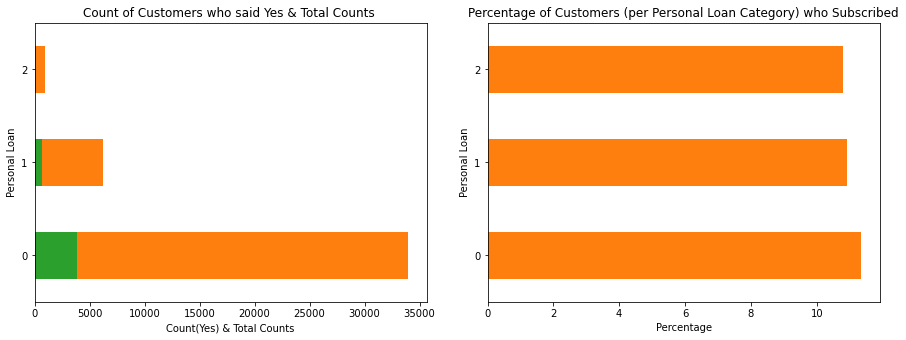

In [29]:
fig, axs = plt.subplots(1,2, figsize=(13,5))
plt.tight_layout(pad=3)

ax = data["loan"].value_counts().plot(kind='barh', color="C1", ax=axs[0])
data[data["y"]=='yes']["loan"].value_counts().plot(kind='barh', ax = ax, color="C2")
ax = (data[data["y"]=='yes']["loan"].value_counts() * 100 / data["loan"].value_counts() ).plot(kind='barh', color="C1", ax=axs[1])


axs[0].set_xlabel('Count(Yes) & Total Counts')
axs[0].set_ylabel('Personal Loan')
axs[0].title.set_text('Count of Customers who said Yes & Total Counts ')
axs[0].yaxis.set_major_formatter(FormatStrFormatter('%d'))
axs[1].yaxis.set_major_formatter(FormatStrFormatter('%d'))
axs[1].set_xlabel('Percentage')
axs[1].set_ylabel('Personal Loan')
axs[1].title.set_text('Percentage of Customers (per Personal Loan Category) who Subscribed')

Lets evaluate Contact communication type

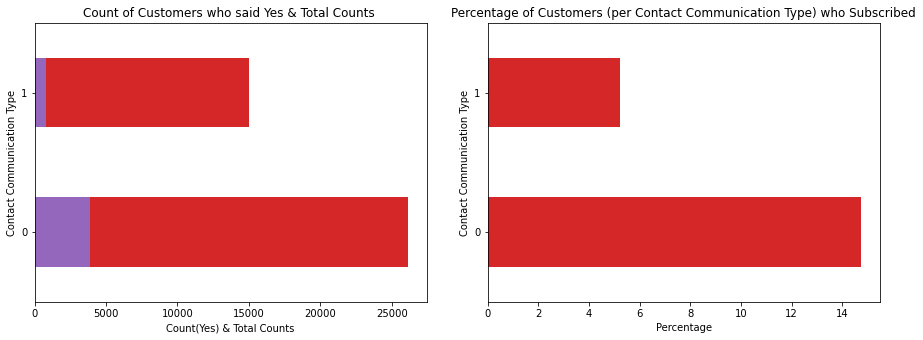

In [31]:
fig, axs = plt.subplots(1,2, figsize=(13,5))
plt.tight_layout(pad=3)

ax = data["contact"].value_counts().plot(kind='barh', color="C3", ax=axs[0])
data[data["y"]=='yes']["contact"].value_counts().plot(kind='barh', ax = ax, color="C4")
ax = (data[data["y"]=='yes']["contact"].value_counts() * 100 / data["contact"].value_counts() ).plot(kind='barh', color="C3", ax=axs[1])

axs[0].set_xlabel('Count(Yes) & Total Counts')
axs[0].set_ylabel('Contact Communication Type')
axs[0].title.set_text('Count of Customers who said Yes & Total Counts ')
axs[0].yaxis.set_major_formatter(FormatStrFormatter('%d'))
axs[1].yaxis.set_major_formatter(FormatStrFormatter('%d'))
axs[1].set_xlabel('Percentage')
axs[1].set_ylabel('Contact Communication Type')
axs[1].title.set_text('Percentage of Customers (per Contact Communication Type) who Subscribed')

eople with a Mobile phone have a higher probability of accepting the offer from the bank.

Time usually plays an important role with how decisions are made. Lets see how it plays out with this dataset.
Lets evaluate the Month when the last contact was made.

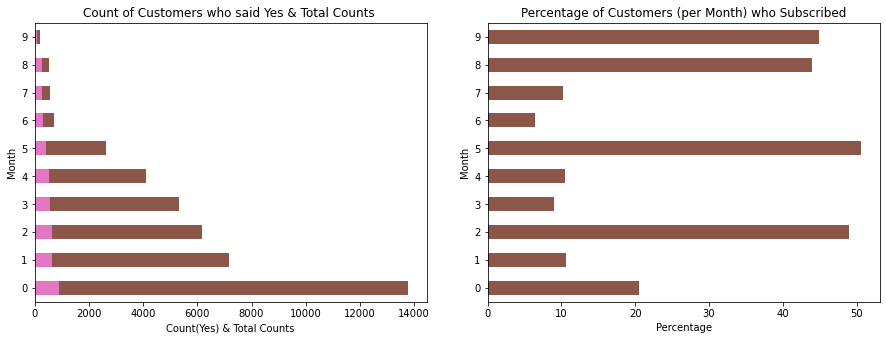

In [32]:
fig, axs = plt.subplots(1,2, figsize=(13,5))
plt.tight_layout(pad=3)

ax = data["month"].value_counts().plot(kind='barh', color="C5", ax=axs[0])
data[data["y"]=='yes']["month"].value_counts().plot(kind='barh', ax = ax, color="C6")
ax = (data[data["y"]=='yes']["month"].value_counts() * 100 / data["month"].value_counts() ).plot(kind='barh', color="C5", ax=axs[1])

axs[0].set_xlabel('Count(Yes) & Total Counts')
axs[0].set_ylabel('Month')
axs[0].title.set_text('Count of Customers who said Yes & Total Counts ')
axs[0].yaxis.set_major_formatter(FormatStrFormatter('%d'))
axs[1].yaxis.set_major_formatter(FormatStrFormatter('%d'))
axs[1].set_xlabel('Percentage')
axs[1].set_ylabel('Month')
axs[1].title.set_text('Percentage of Customers (per Month) who Subscribed')

Conclusion:

Mar, Sep, Dec & Oct where great months for the campaign with a 40% or more probability of customers accepting the marketting offer. It generally seems like the last month of each quarter is a fruitful time for campaigning.

Next is Day of the Week

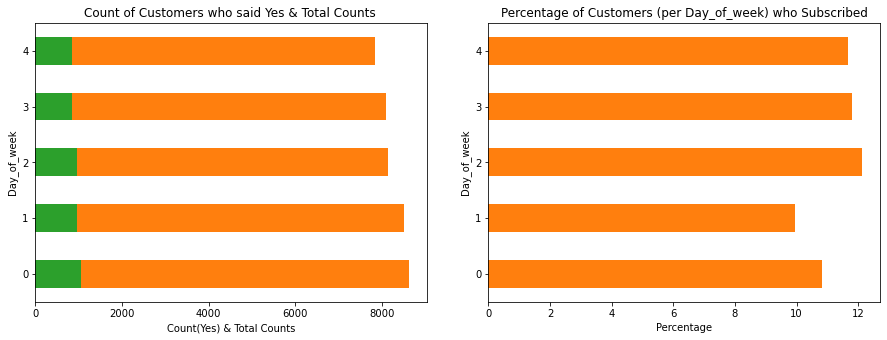

In [33]:
fig, axs = plt.subplots(1,2, figsize=(13,5))
plt.tight_layout(pad=3)

ax = data["day_of_week"].value_counts().plot(kind='barh', color="C1", ax=axs[0])
data[data["y"]=='yes']["day_of_week"].value_counts().plot(kind='barh', ax = ax, color="C2")
ax = (data[data["y"]=='yes']["day_of_week"].value_counts() * 100 / data["day_of_week"].value_counts() ).plot(kind='barh', color="C1", ax=axs[1])

axs[0].set_xlabel('Count(Yes) & Total Counts')
axs[0].set_ylabel('Day_of_week')
axs[0].title.set_text('Count of Customers who said Yes & Total Counts ')
axs[0].yaxis.set_major_formatter(FormatStrFormatter('%d'))
axs[1].yaxis.set_major_formatter(FormatStrFormatter('%d'))
axs[1].set_xlabel('Percentage')
axs[1].set_ylabel('Day_of_week')
axs[1].title.set_text('Percentage of Customers (per Day_of_week) who Subscribed')

Lets plot Duration too

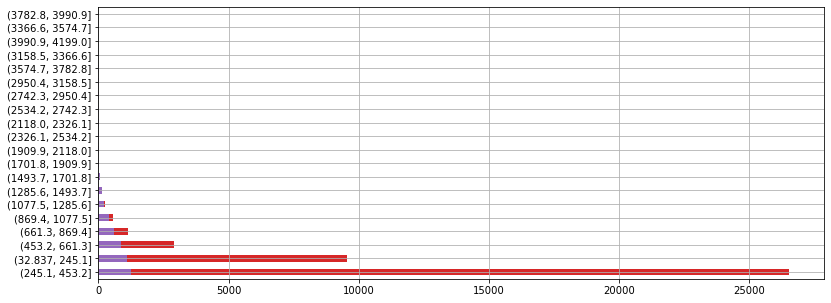

In [35]:
ax = data["duration"].value_counts(bins=20).plot(kind="barh",color="C3",figsize=(13,5))
data[data["y"] == "yes"]["duration"].value_counts(bins=20).plot(kind="barh",ax=ax,color="C4")
plt.grid()

Duration has outliers. Few people had long conversations!

<AxesSubplot:xlabel='duration'>

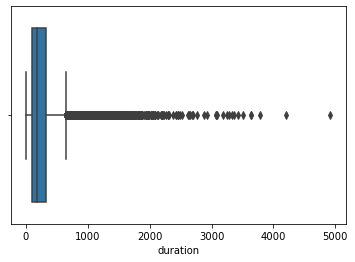

In [36]:
sns.boxplot(x=data["duration"])

Campaign styles play an important role in converting a sale or not.

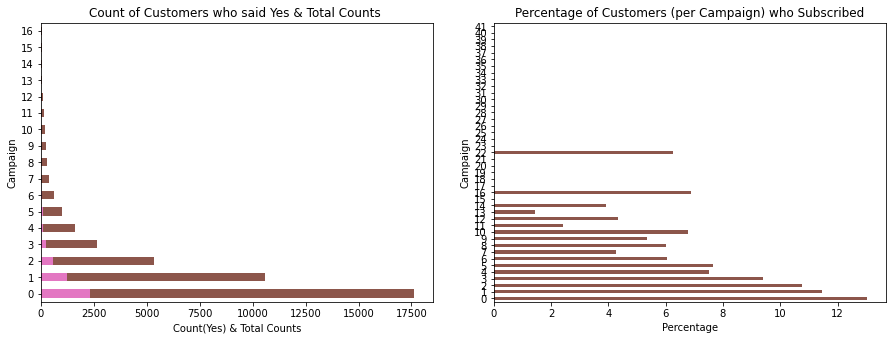

In [38]:
fig, axs = plt.subplots(1,2, figsize=(13,5))
plt.tight_layout(pad=3)

ax = data["campaign"].value_counts().plot(kind='barh', color="C5", ax=axs[0])
data[data["y"]=='yes']["campaign"].value_counts().plot(kind='barh', ax = ax, color="C6")
ax = (data[data["y"]=='yes']["campaign"].value_counts() * 100 / data["campaign"].value_counts() ).plot(kind='barh', color="C5", ax=axs[1])

axs[0].set_xlabel('Count(Yes) & Total Counts')
axs[0].set_ylabel('Campaign')
axs[0].title.set_text('Count of Customers who said Yes & Total Counts ')
axs[0].yaxis.set_major_formatter(FormatStrFormatter('%d'))
axs[1].yaxis.set_major_formatter(FormatStrFormatter('%d'))
axs[1].set_xlabel('Percentage')
axs[1].set_ylabel('Campaign')
axs[1].title.set_text('Percentage of Customers (per Campaign) who Subscribed')

Conclusion:

Increasing the number of calls to a customer only reduces the chances of him accepting the product.

Some campaigns went for too long.

<AxesSubplot:xlabel='campaign'>

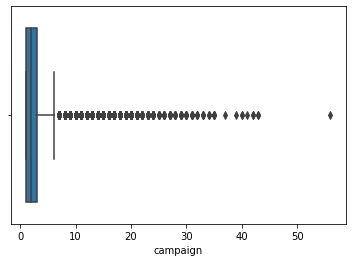

In [39]:
sns.boxplot(x=data["campaign"])

Does prior contact with a customer improve conversions?

Lets explore Previous attribute

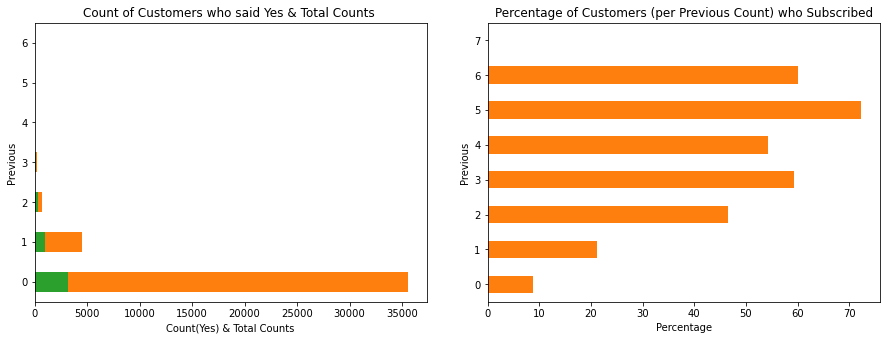

In [40]:
fig, axs = plt.subplots(1,2, figsize=(13,5))
plt.tight_layout(pad=3)

ax = data["previous"].value_counts().plot(kind='barh', color="C1", ax=axs[0])
data[data["y"]=='yes']["previous"].value_counts().plot(kind='barh', ax = ax, color="C2")
ax = (data[data["y"]=='yes']["previous"].value_counts() * 100 / data["previous"].value_counts() ).plot(kind='barh', color="C1", ax=axs[1])

axs[0].set_xlabel('Count(Yes) & Total Counts')
axs[0].set_ylabel('Previous')
axs[0].title.set_text('Count of Customers who said Yes & Total Counts ')
axs[0].yaxis.set_major_formatter(FormatStrFormatter('%d'))
axs[1].yaxis.set_major_formatter(FormatStrFormatter('%d'))
axs[1].set_xlabel('Percentage')
axs[1].set_ylabel('Previous')
axs[1].title.set_text('Percentage of Customers (per Previous Count) who Subscribed')

Conclusion:

Interestingly, if a customer is contacted atleast a couple of times before a campaign begins, chances of the success of the campaign improve by 50% or more. In some cases upto 70%.

lets get an insight on Poutcome

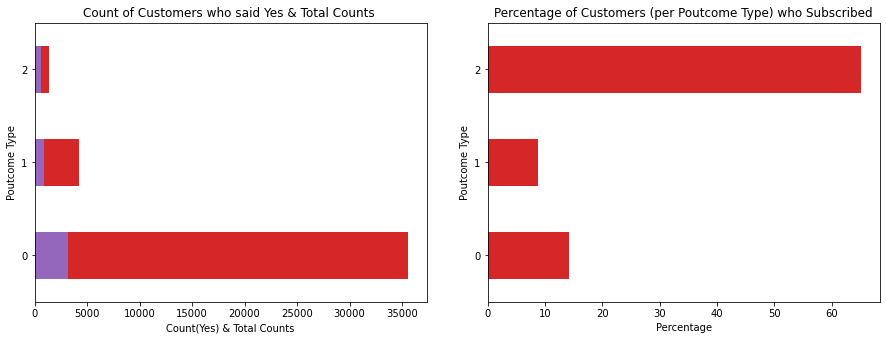

In [44]:
fig, axs = plt.subplots(1,2, figsize=(13,5))
plt.tight_layout(pad=3)

ax = data["poutcome"].value_counts().plot(kind='barh', color="C3", ax=axs[0])
data[data["y"]=='yes']["poutcome"].value_counts().plot(kind='barh', ax = ax, color="C4")
ax = (data[data["y"]=='yes']["poutcome"].value_counts() * 100 / data["poutcome"].value_counts() ).plot(kind='barh', color="C3", ax=axs[1])

axs[0].set_xlabel('Count(Yes) & Total Counts')
axs[0].set_ylabel('Poutcome Type')
axs[0].title.set_text('Count of Customers who said Yes & Total Counts ')
axs[0].yaxis.set_major_formatter(FormatStrFormatter('%d'))
axs[1].yaxis.set_major_formatter(FormatStrFormatter('%d'))
axs[1].set_xlabel('Percentage')
axs[1].set_ylabel('Poutcome Type')
axs[1].title.set_text('Percentage of Customers (per Poutcome Type) who Subscribed')

Pdays

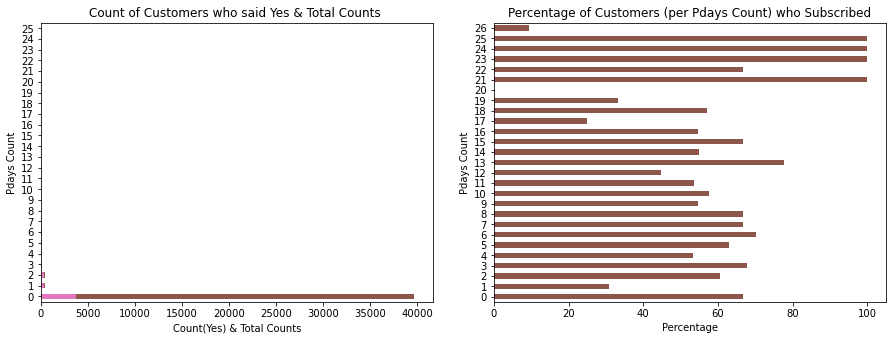

In [45]:
fig, axs = plt.subplots(1,2, figsize=(13,5))
plt.tight_layout(pad=3)

ax = data["pdays"].value_counts().plot(kind='barh', color="C5", ax=axs[0])
data[data["y"]=='yes']["pdays"].value_counts().plot(kind='barh', ax = ax, color="C6")
ax = (data[data["y"]=='yes']["pdays"].value_counts() * 100 / data["pdays"].value_counts() ).plot(kind='barh', color="C5", ax=axs[1])

axs[0].set_xlabel('Count(Yes) & Total Counts')
axs[0].set_ylabel('Pdays Count')
axs[0].title.set_text('Count of Customers who said Yes & Total Counts ')
axs[0].yaxis.set_major_formatter(FormatStrFormatter('%d'))
axs[1].yaxis.set_major_formatter(FormatStrFormatter('%d'))
axs[1].set_xlabel('Percentage')
axs[1].set_ylabel('Pdays Count')
axs[1].title.set_text('Percentage of Customers (per Pdays Count) who Subscribed')

Atleast a single contact improves the changes of the campaign drastically. Look for Pdays=999 ( which means customer was not contacted before)

Lets plot

emp.var.rate
euribor3m
cons.price.idx
nr.employed

Text(0.5, 0.98, 'Percentage of Customers who Subscribed')

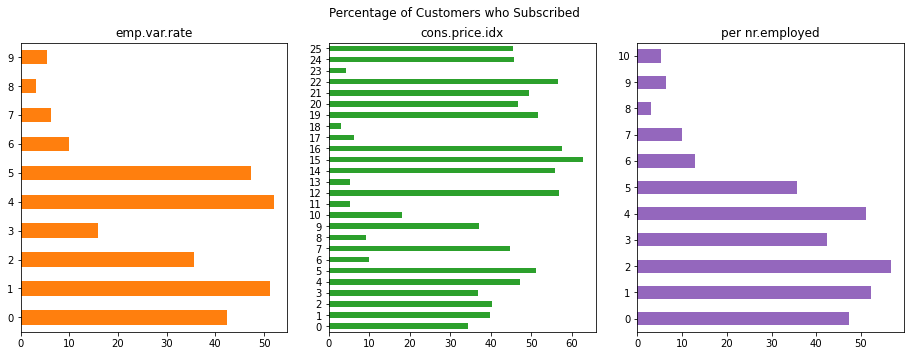

In [48]:
fig, axs = plt.subplots(1,3, figsize=(13,5))
plt.tight_layout()

fig.suptitle("Percentage of Customers who Subscribed", fontsize=12)
fig.subplots_adjust(top=0.88)
ax = (data[data["y"]=='yes']["emp.var.rate"].value_counts() * 100 / data["emp.var.rate"].value_counts() ).plot(kind='barh', color="C1", ax=axs[0])
ax = (data[data["y"]=='yes']["cons.price.idx"].value_counts() * 100 / data["cons.price.idx"].value_counts() ).plot(kind='barh', color="C2", ax=axs[1])
ax = (data[data["y"]=='yes']["nr.employed"].value_counts() * 100 / data["nr.employed"].value_counts() ).plot(kind='barh', color="C4", ax=axs[2])
axs[0].title.set_text('emp.var.rate')
axs[1].title.set_text('cons.price.idx')
axs[2].title.set_text('per nr.employed')
axs[0].yaxis.set_major_formatter(FormatStrFormatter('%d'))
axs[1].yaxis.set_major_formatter(FormatStrFormatter('%d'))
axs[2].yaxis.set_major_formatter(FormatStrFormatter('%d'))
fig.suptitle("Percentage of Customers who Subscribed", fontsize=12)

emp.var.rate & cons.price.idx have a certain degree of correlation

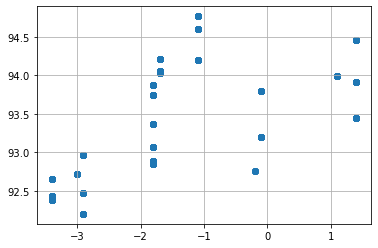

In [51]:
plt.scatter(x=data["emp.var.rate"],y=data["cons.price.idx"],alpha=0.5)
plt.grid()

euribor3m & nr.employed too have a correlation

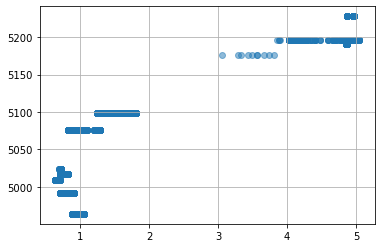

In [52]:
plt.scatter(x=data["euribor3m"],y=data["nr.employed"],alpha=0.5)
plt.grid()

Correlation can be further explored with df_cat.corr(). I have checked this and there is minimal feature correlation apart from the above two.

DATA preprocessing

In [55]:
df1 = data.drop(columns=['day_of_week','month','contact','poutcome','pdays'],axis=1)
df1

age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

       duration  campaign  previous  emp.var.rate  cons.price.idx  \
0           261         1         0           1.1          93.994   
1           149         1         0           1.1          93.994   
2           226         1         0           1.1          93.994   
3           151         1         0           1.1          93.994   
4           307         1         0           1.1          93.994   
...         ...       ...       ...           ...             ...   
41183       334         1         0          -1.1          94.767   
41184       383         1         0          -1.1          94.767   
41185       189         2         0          -1.1          94.767   
41186       442         1         0          -1.1          94.767   
41187       239         3         1          -1.1          94.767   

       cons.conf.idx  euribor3m  nr.employed    y  
0              -36.4      4.857       5191.0   no  
1              -36.4      4.857       5191.0   no  
2              -36.4      4.857       5191.0   no  
3              -36.4      4.857       5191.0   no  
4              -36.4      4.857       5191.0   no  
...              ...        ...          ...  ...  
41183          -50.8      1.028       4963.6  yes  
41184          -50.8      1.028       4963.6   no  
41185          -50.8      1.028       4963.6   no  
41186          -50.8      1.028       4963.6  yes  
41187          -50.8      1.028       4963.6   no  

[41176 rows x 16 columns]

In [56]:
df1.y.replace(("yes","no"),(1,0),inplace=True)
df1.default.replace(("yes","no"),(1,0),inplace=True)
df1.housing.replace(("yes","no"),(1,0),inplace=True)
df1.loan.replace(("yes","no"),(1,0),inplace=True)
df1

age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y        0       0    0   
1       57     services  married          high.school  unknown       0    0   
2       37     services  married          high.school        0       1    0   
3       40       admin.  married             basic.6y        0       0    0   
4       56     services  married          high.school        0       0    1   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course        0       1    0   
41184   46  blue-collar  married  professional.course        0       0    0   
41185   56      retired  married    university.degree        0       1    0   
41186   44   technician  married  professional.course        0       0    0   
41187   74      retired  married  professional.course        0       1    0   

       duration  campaign  previous  emp.var.rate  cons.price.idx  \
0           261         1         0           1.1          93.994   
1           149         1         0           1.1          93.994   
2           226         1         0           1.1          93.994   
3           151         1         0           1.1          93.994   
4           307         1         0           1.1          93.994   
...         ...       ...       ...           ...             ...   
41183       334         1         0          -1.1          94.767   
41184       383         1         0          -1.1          94.767   
41185       189         2         0          -1.1          94.767   
41186       442         1         0          -1.1          94.767   
41187       239         3         1          -1.1          94.767   

       cons.conf.idx  euribor3m  nr.employed  y  
0              -36.4      4.857       5191.0  0  
1              -36.4      4.857       5191.0  0  
2              -36.4      4.857       5191.0  0  
3              -36.4      4.857       5191.0  0  
4              -36.4      4.857       5191.0  0  
...              ...        ...          ... ..  
41183          -50.8      1.028       4963.6  1  
41184          -50.8      1.028       4963.6  0  
41185          -50.8      1.028       4963.6  0  
41186          -50.8      1.028       4963.6  1  
41187          -50.8      1.028       4963.6  0  

[41176 rows x 16 columns]

In [57]:
#creating Dummies for categorical variables
df2 = pd.get_dummies(df1)
df2.head()

age  duration  campaign  previous  emp.var.rate  cons.price.idx  \
0   56       261         1         0           1.1          93.994   
1   57       149         1         0           1.1          93.994   
2   37       226         1         0           1.1          93.994   
3   40       151         1         0           1.1          93.994   
4   56       307         1         0           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed  y  ...  education_unknown  \
0          -36.4      4.857       5191.0  0  ...                  0   
1          -36.4      4.857       5191.0  0  ...                  0   
2          -36.4      4.857       5191.0  0  ...                  0   
3          -36.4      4.857       5191.0  0  ...                  0   
4          -36.4      4.857       5191.0  0  ...                  0   

   default_0  default_1  default_unknown  housing_0  housing_1  \
0          1          0                0          1          0   
1          0          0                1          1          0   
2          1          0                0          0          1   
3          1          0                0          1          0   
4          1          0                0          1          0   

   housing_unknown  loan_0  loan_1  loan_unknown  
0                0       1       0             0  
1                0       1       0             0  
2                0       1       0             0  
3                0       1       0             0  
4                0       0       1             0  

[5 rows x 43 columns]

In [58]:
#Removing extra dummy variables & checking descriptive stats
df3 = df2.drop(columns=['job_unknown','marital_divorced','education_unknown'],axis=1)
df3.describe().T

count         mean         std       min  \
age                            41176.0    40.023800   10.420680    17.000   
duration                       41176.0   258.315815  259.305321     0.000   
campaign                       41176.0     2.567879    2.770318     1.000   
previous                       41176.0     0.173013    0.494964     0.000   
emp.var.rate                   41176.0     0.081922    1.570883    -3.400   
cons.price.idx                 41176.0    93.575720    0.578839    92.201   
cons.conf.idx                  41176.0   -40.502863    4.627860   -50.800   
euribor3m                      41176.0     3.621293    1.734437     0.634   
nr.employed                    41176.0  5167.034870   72.251364  4963.600   
y                              41176.0     0.112663    0.316184     0.000   
job_admin.                     41176.0     0.253036    0.434757     0.000   
job_blue-collar                41176.0     0.224718    0.417402     0.000   
job_entrepreneur               41176.0     0.035360    0.184691     0.000   
job_housemaid                  41176.0     0.025743    0.158370     0.000   
job_management                 41176.0     0.071012    0.256848     0.000   
job_retired                    41176.0     0.041723    0.199959     0.000   
job_self-employed              41176.0     0.034510    0.182538     0.000   
job_services                   41176.0     0.096343    0.295064     0.000   
job_student                    41176.0     0.021250    0.144219     0.000   
job_technician                 41176.0     0.163663    0.369974     0.000   
job_unemployed                 41176.0     0.024626    0.154984     0.000   
marital_married                41176.0     0.605231    0.488807     0.000   
marital_single                 41176.0     0.280843    0.449417     0.000   
marital_unknown                41176.0     0.001943    0.044036     0.000   
education_basic.4y             41176.0     0.101418    0.301885     0.000   
education_basic.6y             41176.0     0.055639    0.229226     0.000   
education_basic.9y             41176.0     0.146809    0.353920     0.000   
education_high.school          41176.0     0.231008    0.421483     0.000   
education_illiterate           41176.0     0.000437    0.020904     0.000   
education_professional.course  41176.0     0.127259    0.333266     0.000   
education_university.degree    41176.0     0.295415    0.456235     0.000   
default_0                      41176.0     0.791165    0.406481     0.000   
default_1                      41176.0     0.000073    0.008535     0.000   
default_unknown                41176.0     0.208762    0.406429     0.000   
housing_0                      41176.0     0.452084    0.497705     0.000   
housing_1                      41176.0     0.523873    0.499436     0.000   
housing_unknown                41176.0     0.024043    0.153185     0.000   
loan_0                         41176.0     0.824218    0.380639     0.000   
loan_1                         41176.0     0.151739    0.358772     0.000   
loan_unknown                   41176.0     0.024043    0.153185     0.000   

                                    25%       50%       75%       max  
age                              32.000    38.000    47.000    98.000  
duration                        102.000   180.000   319.000  4918.000  
campaign                          1.000     2.000     3.000    56.000  
previous                          0.000     0.000     0.000     7.000  
emp.var.rate                     -1.800     1.100     1.400     1.400  
cons.price.idx                   93.075    93.749    93.994    94.767  
cons.conf.idx                   -42.700   -41.800   -36.400   -26.900  
euribor3m                         1.344     4.857     4.961     5.045  
nr.employed                    5099.100  5191.000  5228.100  5228.100  
y                                 0.000     0.000     0.000     1.000  
job_admin.                        0.000     0.000     1.000     1.000  
job_blue-co

<AxesSubplot:>

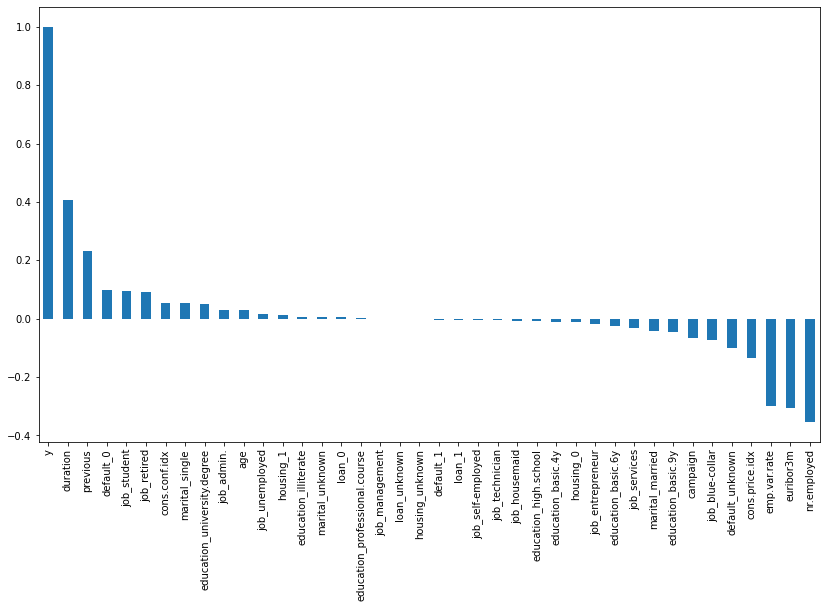

In [59]:
#correlation plot
plt.figure(figsize=(14,8))
df3.corr()["y"].sort_values(ascending=False).plot(kind="bar")

In [61]:
#Creating binary classification target variable
df_target = df3[["y"]].values
df_features = df3.drop(columns=["y"],axis=1).values
x_train,x_test,y_train,y_test =train_test_split(df_features,df_target,test_size=0.3,random_state=0)

In [62]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

# SVM

In [74]:
#Linear SVM
print('Linear Model',end='\n')
lsvclassifier = SVC(kernel='linear')
lsvclassifier.fit(x_train, y_train)

#Applying k-Fold Cross Validation
accuracies = cross_val_score(estimator = lsvclassifier, X = x_train, y = y_train, cv = 5)
mean_svm_linear=accuracies.mean()
std_svm_linear=accuracies.std()

Linear Model


C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:63

In [76]:
#After using 5 fold cross validation
print('After 5 fold cross validation:')
print('Mean of Accuracies: ',mean_svm_linear*100,end='\n')
print('Standard deviation of Accuracies',std_svm_linear*100,end='\n')

#Predict SVM
y_predl = lsvclassifier.predict(x_test)

#Confusion Matrix
print('Test Output:')
print('Confusion Matrix:')
print(sk.confusion_matrix(y_test,y_predl))
print('Classification Report:')
print(sk.classification_report(y_test,y_predl))
print('Accuracy: ',sk.accuracy_score(y_test, y_predl, normalize=True, sample_weight=None))

After 5 fold cross validation:
Mean of Accuracies:  89.94555072516978
Standard deviation of Accuracies 0.3038711051336417
Test Output:
Confusion Matrix:
[[10767   152]
 [ 1160   274]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     10919
           1       0.64      0.19      0.29      1434

    accuracy                           0.89     12353
   macro avg       0.77      0.59      0.62     12353
weighted avg       0.87      0.89      0.87     12353

Accuracy:  0.893790981947705


In [77]:
#polynomial SVM
print("Polynomial Model",end="\n")
psvclassifier = SVC(kernel="poly")
psvclassifier.fit(x_train,y_train)

#Applying k-Fold Cross Validation
accuracies = cross_val_score(estimator = psvclassifier, X = x_train, y = y_train, cv = 5)
mean_svm_poly=accuracies.mean()
std_svm_poly=accuracies.std()


#After using 5 fold cross validation
print('After 5 fold cross validation:')
print('Mean of Accuracies: ',mean_svm_poly*100,end='\n')
print('Standard deviation of Accuracies',std_svm_poly*100,end='\n')

#Predict SVM
y_predp = psvclassifier.predict(x_test)

#Confusion Matrix
print('Test Output:')
print('Confusion Matrix:')
print(sk.confusion_matrix(y_test,y_predp))
print('Classification Report:')
print(sk.classification_report(y_test,y_predp))
print('Accuracy: ',sk.accuracy_score(y_test, y_predp, normalize=True, sample_weight=None))


Polynomial Model


C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:63

After 5 fold cross validation:
Mean of Accuracies:  90.1883972836152
Standard deviation of Accuracies 0.2228768994724456
Test Output:
Confusion Matrix:
[[10719   200]
 [ 1010   424]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.95     10919
           1       0.68      0.30      0.41      1434

    accuracy                           0.90     12353
   macro avg       0.80      0.64      0.68     12353
weighted avg       0.89      0.90      0.88     12353

Accuracy:  0.9020480854853072


In [92]:
#RBF SVM
print("RBF model",end="\n")
rsvclassifier = SVC(kernel="rbf")
rsvclassifier.fit(x_train,y_train)

#Applying k-Fold Cross Validation
accuracies = cross_val_score(estimator = rsvclassifier, X = x_train, y = y_train, cv = 5)
mean_svm_rbf=accuracies.mean()
std_svm_rbf=accuracies.std()

#After using 5 fold cross validation
print('After 5 fold cross validation:')
print('Mean of Accuracies: ',mean_svm_rbf*100,end='\n')
print('Standard deviation of Accuracies',std_svm_rbf*100,end='\n')

#Predict SVM
y_predr = rsvclassifier.predict(x_test)

#Confusion Matrix
print('Test Output:')
print('Confusion Matrix:')
print(sk.confusion_matrix(y_test,y_predr))
print('Classification Report:')
print(sk.classification_report(y_test,y_predr))
print('Accuracy: ',sk.accuracy_score(y_test, y_predr, normalize=True, sample_weight=None))

RBF model


C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:63

After 5 fold cross validation:
Mean of Accuracies:  90.18840149674416
Standard deviation of Accuracies 0.1713587125215372
Test Output:
Confusion Matrix:
[[10734   185]
 [ 1036   398]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.95     10919
           1       0.68      0.28      0.39      1434

    accuracy                           0.90     12353
   macro avg       0.80      0.63      0.67     12353
weighted avg       0.89      0.90      0.88     12353

Accuracy:  0.9011576135351737


# Decision Trees

In [84]:
model_class = DecisionTreeClassifier(criterion="entropy",random_state=0)
model_class.fit(x_train,y_train)


#Applying k-Fold Cross Validation
accuracies = cross_val_score(estimator = model_class, X = x_train, y = y_train, cv = 5)
mean_dt_e=accuracies.mean()
std_dt_e=accuracies.std()

#After using 5 fold cross validation
print('After 5 fold cross validation:')
print('Mean of Accuracies: ',mean_dt_e*100,end='\n')
print('Standard deviation of Accuracies',std_dt_e*100,end='\n')


#predict y
y_pred = model_class.predict(x_test)

#Confusion Matrix
print('Test Output:')
print('Confusion Matrix:')
print(sk.confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(sk.classification_report(y_test, y_pred))
print('Accuracy: ',sk.accuracy_score(y_test,y_pred))

After 5 fold cross validation:
Mean of Accuracies:  88.73470769612265
Standard deviation of Accuracies 0.2599817540888869
Test Output:
Confusion Matrix:
[[10123   796]
 [  706   728]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     10919
           1       0.48      0.51      0.49      1434

    accuracy                           0.88     12353
   macro avg       0.71      0.72      0.71     12353
weighted avg       0.88      0.88      0.88     12353

Accuracy:  0.8784101028090342


In [91]:
model_class = DecisionTreeClassifier(criterion="gini",random_state=0)
model_class.fit(x_train,y_train)


#Applying k-Fold Cross Validation
accuracies = cross_val_score(estimator = model_class, X = x_train, y = y_train, cv = 5)
mean_dt_e=accuracies.mean()
std_dt_e=accuracies.std()

#After using 5 fold cross validation
print('After 5 fold cross validation:')
print('Mean of Accuracies: ',mean_dt_e*100,end='\n')
print('Standard deviation of Accuracies',std_dt_e*100,end='\n')


#predict y
y_pred = model_class.predict(x_test)

#Confusion Matrix
print('Test Output:')
print('Confusion Matrix:')
print(sk.confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(sk.classification_report(y_test, y_pred))
print('Accuracy: ',sk.accuracy_score(y_test,y_pred))

After 5 fold cross validation:
Mean of Accuracies:  88.65490922813673
Standard deviation of Accuracies 0.24312252174712137
Test Output:
Confusion Matrix:
[[10137   782]
 [  672   762]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.93     10919
           1       0.49      0.53      0.51      1434

    accuracy                           0.88     12353
   macro avg       0.72      0.73      0.72     12353
weighted avg       0.89      0.88      0.88     12353

Accuracy:  0.8822957985914353


In [90]:
#Pruning the better tree - Entropy Tree
parameters = [{'criterion': ['entropy'],'min_samples_leaf':[5,10,20,50,100],'max_depth':[5,10,20,50,100]}] 
grid_search = GridSearchCV(estimator = model_class,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(x_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print('Accuracy: ',best_accuracy,end='\n')
print('Best Parameters: ',best_parameters,end='\n')

Accuracy:  0.9134721763873174
Best Parameters:  {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 20}
